# Project 3

* You got a job at Charles Schwab! Your boss wants you to create an ETF Recommender for your company.
* From project 2, you have already done ETL for ETF holdings into your MongoDb collection.
* For project 3, we would work off this data to make recommendations and predictions


## Cosine Similarity and Jaccard similarity

In [ ]:
!python -m pip install "pymongo[srv]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.1/669.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 24.6 MB/s eta 0:00:00


In [ ]:
from pymongo import MongoClient
# Connect to MongoDB
# Provide the mongodb atlas url to connect python to mongodb using pymongo
CONNECTION_STRING = 'mongodb+srv://<YOUR_NEW_USERNAME>:<YOUR_NEW_PASSWORD>@cluster0.3adkpdv.mongodb.net/'

# Create a connection using MongoClient. You can import MongoClient or use pymongo.MongoClient
client = MongoClient(CONNECTION_STRING)

# Database and Collection
db_name = 'ProjectDB'
collection_name = 'Funders'

# Access the database and collection
db = client[db_name]
collection = db[collection_name]

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(collection.find({}))

In [ ]:
df

,_id,ETF,Date,Holdings
0,6676bf986a4d7f0d171844d0,ICF,2024-06-16,"{'AMT': {'Weight': 8.26, 'Shares': 843937.0}, ..."
1,6676bf986a4d7f0d171844d1,DVY,2024-06-16,"{'MO': {'Weight': 2.96, 'Shares': 11879296.0},..."
2,6676bf986a4d7f0d171844d2,ITA,2024-06-16,"{'RTX': {'Weight': 18.71, 'Shares': 11122624.0..."
3,6676bf986a4d7f0d171844d3,IYF,2024-06-16,"{'BRKB': {'Weight': 12.74, 'Shares': 809630.0}..."
4,6676bf986a4d7f0d171844d4,IYH,2024-06-16,"{'LLY': {'Weight': 13.37, 'Shares': 504029.0},..."
...,...,...,...,...
310,6676bf986a4d7f0d17184606,XLY,2024-06-16,"{'AMZN': {'Weight': 24.17, 'Shares': '25,116,1..."
311,6676bf986a4d7f0d17184607,XME,2024-06-16,"{'CRS': {'Weight': 6.44, 'Shares': '1,248,703'..."
312,6676bf986a4d7f0d17184608,XOP,2024-06-16,"{'AR': {'Weight': 3.39, 'Shares': '3,500,445'}..."
313,6676bf986a4d7f0d17184609,XSOE,2024-06-16,"{'2330.TW': {'Weight': 9.23, 'Shares': '6,531,..."


In [ ]:
df["Holdings"][0].keys()

dict_keys(['AMT', 'PLD', 'EQIX', 'WELL', 'SPG', 'DLR', 'PSA', 'CCI', 'O', 'EXR', 'VICI', 'AVB', 'IRM', 'EQR', 'SBAC', 'INVH', 'ARE', 'ESS', 'MAA', 'SUI', 'HST', 'KIM', 'UDR', 'ELS', 'AMH', 'REG', 'LAMR', 'REXR', 'BXP', 'FRT', 'XTSLA', 'MLPFT', 'DJEU4', 'USD'])

In [ ]:
df["Holdings"][0]['AMT']["Weight"]

8.26

In [ ]:
new_dict = []
for i in range(len(df)):
  for j in list(df["Holdings"][i]):
    temp = { 'ETF' : df['ETF'][i].strip(),
             'Ticker' : j.strip(),
             'Weight' : df["Holdings"][i][j]["Weight"]
    }
    new_dict.append(temp)

In [ ]:
df = pd.DataFrame(new_dict)
df

,ETF,Ticker,Weight
0,ICF,AMT,8.26
1,ICF,PLD,8.08
2,ICF,EQIX,7.89
3,ICF,WELL,6.31
4,ICF,SPG,5.32
...,...,...,...
67623,XYLD,VZ,0.37
67624,XYLD,INTU,0.37
67625,XYLD,CAT,0.37
67626,XYLD,AMGN,0.35


In [ ]:
# Pivot the DataFrame
pivot_df = df.pivot(index="Ticker", columns="ETF", values="Weight")
# Print the reshaped DataFrame

pivot_df

ETF,AAXJ,ACWI,ACWV,ACWX,AIQ,AMLP,ARKK,AVDE,AVDV,AVEM,...,XLU,XLV,XLY,XME,XMHQ,XMMO,XOP,XSOE,XT,XYLD
Ticker,,,,,,,,,,,,,,,,,,,,,
-,0.00,0.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.0,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
000001,0.03,0.0,0.04,0.01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000002,0.01,0.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000027,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZYME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZYXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def jaccard(set1,set2):
    return len(set1.intersection(set2))/len(set1.union(set2))

jaccard_similarity = pivot_df.apply(lambda col1: pivot_df.apply(lambda col2: jaccard(set(col1.dropna().index), set(col2.dropna().index))))

In [ ]:
from scipy.spatial.distance import cosine
cosine_similarity = pivot_df.apply(lambda col1: pivot_df.apply(lambda col2: 1 - cosine(col1.fillna(0), col2.fillna(0))))

In [ ]:
jaccard_similarity

ETF,AAXJ,ACWI,ACWV,ACWX,AIQ,AMLP,ARKK,AVDE,AVDV,AVEM,...,XLU,XLV,XLY,XME,XMHQ,XMMO,XOP,XSOE,XT,XYLD
ETF,,,,,,,,,,,,,,,,,,,,,
AAXJ,1.000000,0.287361,0.134858,0.371733,0.000000,0.000000,0.000000,0.000946,0.000000,0.003795,...,0.000962,0.000000,0.000000,0.000962,0.000000,0.000000,0.000947,0.001894,0.027500,0.000000
ACWI,0.287361,1.000000,0.178420,0.703719,0.015705,0.000849,0.007624,0.006308,0.000000,0.002094,...,0.013225,0.021340,0.019165,0.003378,0.006658,0.006656,0.008007,0.001255,0.074927,0.020904
ACWV,0.134858,0.178420,1.000000,0.152118,0.014768,0.000000,0.000000,0.002083,0.000000,0.004175,...,0.022075,0.043384,0.016913,0.002160,0.001976,0.005941,0.010526,0.002083,0.089701,0.043384
ACWX,0.371733,0.703719,0.152118,1.000000,0.001602,0.001088,0.000537,0.008060,0.000000,0.002672,...,0.001617,0.001602,0.000533,0.001616,0.001053,0.001052,0.002674,0.001067,0.045895,0.000533
AIQ,0.000000,0.015705,0.014768,0.001602,1.000000,0.000000,0.048780,0.010101,0.010309,0.041667,...,0.000000,0.010101,0.030928,0.000000,0.000000,0.000000,0.000000,0.041667,0.086957,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XMMO,0.000000,0.006656,0.005941,0.001052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009174,0.264463,1.000000,0.000000,0.000000,0.016835,0.000000
XOP,0.000947,0.008007,0.010526,0.002674,0.000000,0.015873,0.011905,0.000000,0.010417,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,1.000000,0.000000,0.000000,0.020619
XSOE,0.001894,0.001255,0.002083,0.001067,0.041667,0.000000,0.000000,0.000000,0.000000,0.219512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.003650,0.000000


In [ ]:
cosine_similarity

ETF,AAXJ,ACWI,ACWV,ACWX,AIQ,AMLP,ARKK,AVDE,AVDV,AVEM,...,XLU,XLV,XLY,XME,XMHQ,XMMO,XOP,XSOE,XT,XYLD
ETF,,,,,,,,,,,,,,,,,,,,,
AAXJ,1.000000,0.147490,0.101025,0.596565,0.000000,0.000000,0.000000,0.000388,0.000000,0.018612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000563,0.018249,0.116127,0.000000
ACWI,0.147490,1.000000,0.223446,0.256153,0.583573,0.003945,0.064715,0.046828,0.000000,0.002524,...,0.036103,0.160339,0.266408,0.005019,0.005181,0.005586,0.031027,0.003406,0.290401,0.939434
ACWV,0.101025,0.223446,1.000000,0.177412,0.078003,0.000000,0.000000,0.001043,0.000000,0.001129,...,0.107123,0.272981,0.030284,0.001116,0.003831,0.019700,0.010177,0.000838,0.130114,0.134918
ACWX,0.596565,0.256153,0.177412,1.000000,0.005390,0.016255,0.007188,0.193674,0.000000,0.010631,...,0.005651,0.004171,0.000480,0.001099,0.014808,0.009079,0.003442,0.010215,0.167246,0.000732
AIQ,0.000000,0.583573,0.078003,0.005390,1.000000,0.000000,0.113724,0.010942,0.011967,0.131703,...,0.000000,0.000976,0.225276,0.000000,0.000000,0.000000,0.000000,0.170289,0.282694,0.582656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XMMO,0.000000,0.005586,0.019700,0.009079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.026707,0.527640,1.000000,0.000000,0.000000,0.029155,0.000000
XOP,0.000563,0.031027,0.010177,0.003442,0.000000,0.000029,0.000187,0.000000,0.002548,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.096386,0.000000,1.000000,0.000000,0.000000,0.020487
XSOE,0.018249,0.003406,0.000838,0.010215,0.170289,0.000000,0.000000,0.000000,0.000000,0.211440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.004690,0.000000


In [ ]:
cosine_similarity['XLK']["QQQ"]

0.7688066860820493

In [ ]:
jaccard_similarity["QQQ"]["XLK"]

0.23333333333333334

In [ ]:
cosine_similarity["QQQ"][cosine_similarity['QQQ']>0.9]

ETF
FELG    0.909383
GSUS    0.902031
ITOT    0.904202
IUSG    0.923544
IVV     0.904104
IVW     0.923627
IWB     0.902925
IWF     0.921501
IWV     0.902557
IWY     0.920613
JEPQ    0.960864
ONEQ    0.950997
PBUS    0.908662
QLD     0.971974
QQQ     1.000000
QQQM    1.000000
QYLD    0.993752
SCHG    0.917917
SPYG    0.920158
TQQQ    0.980519
VONG    0.907668
VOOG    0.912827
Name: QQQ, dtype: float64

# Selenium Web mining to get ETF expense ratios

When comparing similar ETFs, a potential investor might be most convinced if the recommended ETF is of lower cost. This is typically measured by the expense ratio of the fund. Let's get that data for all of the ETFs!

This is an exercise for your Selenium skills! Please note:

1. While the data can be available on Bloomberg and other sources, please follow this template to do it in Selenium.
2. Using Selenium go to https://stockanalysis.com/etf/screener/
3. Using Selenium, Click on "Columns" and select "Expense Ratio" box
4. Loop until all pages are loaded:
   1. Using Selenium, Extract all the ETF symbols and expense ratios from the page
   2. Using Selenium, Click on "Next" at the bottom right of the page
5. Store all documents that pair ETF tickers and Expense ratio into Mongo.
6. Update your ETF recommender to recommend similar ETFs for an ETF that the user has entered, and also report the difference in expense ratios.



In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF


Executing: /tmp/apt-key-gpghome.YA5tzD6AJo/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.jZ7krv2BIP/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.D2EbjWseAh/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [ ]:
!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium
!pip install user-agent


from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium import webdriver
from user_agent import generate_user_agent
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd


Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:3 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://deb.debian.org/debian buster-updates/main amd64 Packages [9,745 B]
Get:10 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [789 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:14 h

# Set up webdriver to be Stealth


In [ ]:
# https://piprogramming.org/articles/How-to-make-Selenium-undetectable-and-stealth--7-Ways-to-hide-your-Bot-Automation-from-Detection-0000000017.html

service = Service(executable_path=r'/usr/bin/chromedriver')

options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument("window-size=1280,800")
options.add_argument(f"user-agent={generate_user_agent()}")

driver = webdriver.Chrome(service=service , options=options)

#Remove navigator.webdriver Flag using JavaScript
driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")



In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By


driver.get("https://stockanalysis.com/etf/screener/")

driver.find_element(By.CSS_SELECTOR, ".relative:nth-child(3) > .controls-btn").click() # click on columns
driver.find_element(By.CSS_SELECTOR, ".border-0").send_keys("expense")                # type "expense"
driver.find_element(By.CSS_SELECTOR, ".border-gray-500").click()         # check the box

soup = BeautifulSoup(driver.page_source, "html.parser")
[c.text for c in soup.find_all('th')]

['Symbol ',
 'Fund Name ',
 'Asset Class ',
 'Assets ',
 'Stock Price ',
 '% Change ',
 'Volume ',
 'Holdings ',
 'Exp. Ratio ']

In [ ]:
exp_list = []

In [ ]:
for row in soup.find('table',{'class':'svelte-s60nj6'}).find_all('tr'):
      cells=[d.text for d in row.find_all('td')]
      if len(cells) > 4 :
        print(cells)
        try :
          exp = float(cells[8][:-1])
        except :
          exp = 0
        exp_list.append({
        'ETF' : cells[0],
        'Expense_Ratio': exp
        })

['SPY', 'SPDR S&P 500 ETF Trust', 'Equity', '527.00B', '544.51', '-0.13%', '52,626,311', '504', '0.09%']
['IVV', 'iShares Core S&P 500 ETF', 'Equity', '486.77B', '547.01', '-0.17%', '2,740,391', '507', '0.03%']
['VOO', 'Vanguard S&P 500 ETF', 'Equity', '478.81B', '501.78', '-0.22%', '3,615,723', '507', '0.03%']
['VTI', 'Vanguard Total Stock Market ETF', 'Equity', '411.06B', '268.31', '-0.15%', '2,671,957', '3,708', '0.03%']
['QQQ', 'Invesco QQQ Trust Series I', 'Equity', '288.99B', '480.18', '-0.27%', '36,497,652', '101', '0.20%']
['VUG', 'Vanguard Growth ETF', 'Equity', '139.84B', '373.39', '-0.10%', '1,321,182', '202', '0.04%']
['VEA', 'Vanguard FTSE Developed Markets ETF', 'Equity', '132.38B', '49.09', '-0.67%', '7,087,204', '4,021', '0.06%']
['VTV', 'Vanguard Value ETF', 'Equity', '117.64B', '161.94', '-0.23%', '1,289,254', '345', '0.04%']
['IEFA', 'iShares Core MSCI EAFE ETF', 'Equity', '116.81B', '72.29', '-0.74%', '5,952,023', '2,785', '0.07%']
['AGG', 'iShares Core U.S. Aggrega

In [ ]:
for i in range(0,178):
  try :
    driver.find_element(By.CSS_SELECTOR, ".xs\\3Apl-1 > .hidden").click()
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for row in soup.find('table',{'class':'svelte-s60nj6'}).find_all('tr'):
      cells=[d.text for d in row.find_all('td')]
      if len(cells) > 4 :
        print(cells)
        try :
          exp = float(cells[8][:-1])
        except :
          exp = 0
        exp_list.append({
        'ETF' : cells[0],
        'Expense_Ratio': exp
        })
  except :
    driver.refresh()

['VO', 'Vanguard Mid-Cap ETF', 'Equity', '65.41B', '243.75', '-0.11%', '348,405', '333', '0.04%']
['GLD', 'SPDR Gold Shares', 'Commodity', '62.89B', '214.78', '-1.55%', '8,546,536', '2', '0.40%']
['IWM', 'iShares Russell 2000 ETF', 'Equity', '59.17B', '200.35', '0.23%', '36,356,051', '1,940', '0.19%']
['ITOT', 'iShares Core S&P Total U.S. Stock Market ETF', 'Equity', '56.96B', '118.69', '-0.13%', '766,670', '2,493', '0.03%']
['BNDX', 'Vanguard Total International Bond ETF', 'Fixed Income', '56.39B', '48.93', '0.10%', '2,790,867', '6,900', '0.07%']
['IWD', 'iShares Russell 1000 Value ETF', 'Equity', '55.77B', '174.86', '-0.01%', '1,669,772', '851', '0.19%']
['SCHD', 'Schwab US Dividend Equity ETF', 'Equity', '54.94B', '78.12', '0.08%', '2,501,110', '103', '0.06%']
['VB', 'Vanguard Small-Cap ETF', 'Equity', '54.88B', '218.21', '0.36%', '308,219', '1,417', '0.05%']
['VYM', 'Vanguard High Dividend Yield Index ETF', 'Equity', '54.42B', '118.88', '-0.27%', '850,869', '560', '0.06%']
['RSP', 

In [ ]:
exp_df = pd.DataFrame(exp_list)
exp_df

,ETF,Expense_Ratio
0,SPY,0.09
1,IVV,0.03
2,VOO,0.03
3,VTI,0.03
4,QQQ,0.20
...,...,...
3540,ROYA,0.75
3541,ETHT,0.94
3542,ETHD,1.01
3543,SYFI,0.40


In [ ]:
# function to recommend etf similar to the one entered with cosine similarity greater that entered value,and exp. ratio less than entered value
def ETF_recommender(etf,cosine,exp):
  temp_df = pd.DataFrame(cosine_similarity[etf][cosine_similarity[etf] > cosine]).sort_values(by= etf, ascending=False)
  result = pd.merge(temp_df, exp_df, on='ETF', how='left').dropna()
  result = result[result['Expense_Ratio'] < exp]
  return result

In [ ]:
qqq_similar = ETF_recommender("QQQ",0.9,0.2) #ETFs similar to QQQ with cosine similarity grater than 0.9 and expense ratio less than 0.2
qqq_similar

,ETF,QQQ,Expense_Ratio
1,QQQM,1.000000,0.15
7,IVW,0.923627,0.18
8,IUSG,0.923544,0.04
9,IWF,0.921501,0.19
11,SPYG,0.920158,0.04
12,SCHG,0.917917,0.04
13,VOOG,0.912827,0.10
14,FELG,0.909383,0.18
15,PBUS,0.908662,0.04
16,VONG,0.907668,0.08


# Apriori

![](https://s3.ap-south-1.amazonaws.com/techleer/243.jpg)

* Support. This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears
* Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}.
* Lift. This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.
  * Since this is a symmetrical equation, it doesn't show any statistical direction. It is the boost in sales if you sell both rather than one or the other.

In [ ]:
etf1=set(['AAPL','MSFT','TSLA'])
etf2=set(['AAPL','MSFT','META'])
etf3=set(['AAPL','INTC','C'])
'''
Example:

AAPL => MSFT?
Support(['AAPL','MSFT']) = 2/3
Confidence(['AAPL','MSFT']) = 2/3

MSFT => AAPL?
Support(['AAPL','MSFT']) = 2/3
Confidence(['AAPL','MSFT']) = 2/2 = 1
'''






" \nExample:\n\nAAPL => MSFT?\nSupport(['AAPL','MSFT']) = 2/3\nConfidence(['AAPL','MSFT']) = 2/3\n\nMSFT => AAPL?\nSupport(['AAPL','MSFT']) = 2/3\nConfidence(['AAPL','MSFT']) = 2/2 = 1\n"

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=b62193fbe0e65a4ec208d3b3dc4c3827349a4a6c6b34e63edfd44ad6c1558c77
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
list_of_list = []
for column in pivot_df.columns:
  thisholding = pivot_df[column].dropna()
  thisholding = thisholding[thisholding > 0.1]
  list_of_list.append(thisholding.index.to_list())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Most certainly bought stocks together
results = list(apriori(list_of_list,max_length = 2,min_support = 0.3, min_confidence = 0.6))
for r in results:
  for os in r.ordered_statistics:
    print(os)

OrderedStatistic(items_base=frozenset({'AAPL'}), items_add=frozenset({'MSFT'}), confidence=0.9807692307692308, lift=2.8343330980945662)
OrderedStatistic(items_base=frozenset({'MSFT'}), items_add=frozenset({'AAPL'}), confidence=0.9357798165137615, lift=2.8343330980945662)
OrderedStatistic(items_base=frozenset({'AVGO'}), items_add=frozenset({'MSFT'}), confidence=0.9223300970873786, lift=2.6654493631424243)
OrderedStatistic(items_base=frozenset({'MSFT'}), items_add=frozenset({'AVGO'}), confidence=0.8715596330275229, lift=2.6654493631424243)
OrderedStatistic(items_base=frozenset({'MSFT'}), items_add=frozenset({'NVDA'}), confidence=0.8807339449541285, lift=2.7199136535348085)
OrderedStatistic(items_base=frozenset({'NVDA'}), items_add=frozenset({'MSFT'}), confidence=0.9411764705882353, lift=2.7199136535348085)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def stock_combo(tic):  #function to check similar stocks
  results = list(apriori(list_of_list,max_length = 2,min_support = 0.1, min_confidence = 0.8))
  for r in results:
    for os in r.ordered_statistics:
      if tic in os.items_base:
        print(os)

In [ ]:
stock_combo("AMZN") #example

OrderedStatistic(items_base=frozenset({'AMZN'}), items_add=frozenset({'AAPL'}), confidence=0.9080459770114941, lift=2.750331564986737)
OrderedStatistic(items_base=frozenset({'AMZN'}), items_add=frozenset({'AVGO'}), confidence=0.8735632183908045, lift=2.6715768329427516)
OrderedStatistic(items_base=frozenset({'AMZN'}), items_add=frozenset({'COST'}), confidence=0.8045977011494252, lift=2.9131985731272287)
OrderedStatistic(items_base=frozenset({'AMZN'}), items_add=frozenset({'GOOG'}), confidence=0.8160919540229885, lift=3.097216452014956)
OrderedStatistic(items_base=frozenset({'AMZN'}), items_add=frozenset({'GOOGL'}), confidence=0.896551724137931, lift=3.1731886865555987)
OrderedStatistic(items_base=frozenset({'AMZN'}), items_add=frozenset({'META'}), confidence=0.9080459770114941, lift=3.2138705927934907)
OrderedStatistic(items_base=frozenset({'AMZN'}), items_add=frozenset({'MSFT'}), confidence=0.9425287356321839, lift=2.7238215754508066)
OrderedStatistic(items_base=frozenset({'AMZN'}), i

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Clustering on stock level features

You receive some feedback on your ETF recommender. It is awesome, but your boss would like to approach the problem from a different angle. Instead of ETF holdings or underlying stock tickers, he wants you to explore the characteristics of the underlying stocks.

## Overview:

1. From your holding database, retrieve a list of stock tickers that are held by some ETF.
2. For each of these stocks, retrieve stock characteristics from Finviz.com, and store these in MongoDb.
3. For each characteristic, perform feature engineering by:
  * Cleaning and Normalizing the data. (Eg. subtracting the mean, dividing by the standard deviation, replacing NaN with an appropriate value, and clipping the outliers to avoid skewness or kurtosis.)
4. Experiment with several clustering algorithms on your feature set.
5. For ARKK, QQQ or IWM, the holdings might be concentrated in one of the clusters. Report what cluster that is, and other ETFs that have holdings similar clustering. Recommend these ETFs are possible replacements.







## Finviz hint

1. Look at this website - https://finviz.com/quote.ashx?t=TSLA
2. Notice the format of the data
```
<tr class="table-dark-row">
<td width="7%" class="snapshot-td2-cp" align="left" data-boxover="cssbody=[tooltip_short_bdy] cssheader=[tooltip_short_hdr] body=[Major index membership] offsetx=[10] offsety=[20] delay=[300]">Index</td><td width="8%" class="snapshot-td2" align="left"><b>S&P 500</b></td>
<td width="7%" class="snapshot-td2-cp" align="left" data-boxover="cssbody=[tooltip_short_bdy] cssheader=[tooltip_short_hdr] body=[Price-to-Earnings (ttm)] offsetx=[10] offsety=[20] delay=[300]">P/E</td><td width="8%" class="snapshot-td2" align="left"><b><span class="is-red">104.58</span></b></td>
...
```
3. Load the URL in beautifulsoup.
4. Capture the text such as "Index" and the next next text such as "S&P 500" as your key value pairs in a dictionary.
  * Hint, it seems that the data is in \<td> tags with the labels class="snapshot-td2-cp".
  * Hint: If you have a problem with this, ask me questions during the Lab.
5. Now get tickers from your ETF holdings.
  * For example, you could get lists of tickers from the holdings of SPY, QQQ, ARKK, ARKG,... etc. and form a union of these lists.
6. Loop through your code above to get the features from finviz. Each stock will be a row in your Pandas DataFrame. The columns will be the many features.
  * You need to slow down or the website will kick you out. Use this every loop
  ```
  import time
  time.sleep(1)
  ```

In [ ]:
! pip install random-user-agent

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 36.9 MB/s eta 0:00:00


In [ ]:
from random_user_agent.user_agent import UserAgent
from random_user_agent.params import SoftwareName, OperatingSystem


# you can also import SoftwareEngine, HardwareType, SoftwareType, Popularity from random_user_agent.params
# you can also set number of user agents required by providing `limit` as parameter

software_names = [SoftwareName.CHROME.value]
operating_systems = [OperatingSystem.WINDOWS.value, OperatingSystem.LINUX.value]

user_agent_rotator = UserAgent(software_names=software_names, operating_systems=operating_systems, limit=100)

# Get list of user agents.
user_agents = user_agent_rotator.get_user_agents()

# Get Random User Agent String.
user_agent_rotator.get_random_user_agent()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2583.0 Safari/537.36'

In [ ]:
from bs4 import BeautifulSoup
import requests

def getFinvizForTicker(tic):
  url = f'https://finviz.com/quote.ashx?t={tic}&p=d'
  res = requests.get(url, headers={'User-Agent': user_agent_rotator.get_random_user_agent()})
  if res.status_code>200:
    print('Error')

  soup = BeautifulSoup(res.content, 'html.parser')
  d = {}
  for row in soup.find('table',{'class':'js-snapshot-table'}).find_all('tr'):
    row_data = [cell.text for cell in row.find_all('td')]
    keys = row_data[0::2]
    values = row_data[1::2]
    d.update({key:value for key, value in zip(keys, values)})
    d['Ticker'] = tic
  return pd.Series(d)


getFinvizForTicker('NVDA') # Not cached, so slow for repeat queries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index           NDX, S&P 500
P/E                    74.04
EPS (ttm)               1.71
Insider Own            4.25%
Shs Outstand          24.64B
                    ...     
SMA50                 26.33%
SMA200                83.39%
Trades                  \n\n
Volume           649,880,243
Change                -3.22%
Length: 78, dtype: object

In [ ]:
union_set = set()
for tic in ['SPY', 'QQQ', 'ARKK', 'IVV','IWM','VTI', 'SMH', 'XLU', 'IYR']:
  thisholding = pivot_df[tic].dropna()
  thisholding = thisholding[thisholding > 0.1]
  thisholding = thisholding.index.to_list()
  alphabetic_elements = [elem for elem in thisholding if elem.isalpha()]
  union_set.update(alphabetic_elements)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(union_set)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


617

In [ ]:
import time
finviz_data = []

for tic in list(union_set):
  try :
    finviz_data.append(getFinvizForTicker(tic))
  except :
    print(f"Missing : {tic}")
  time.sleep(1)

finviz_df = pd.concat(finviz_data,axis = 1 )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Error
Missing : AIT
Error
Missing : MPW
Error
Missing : HP
Error
Missing : ETR
Error
Missing : AMR
Error
Missing : NOG
Error
Missing : CLSK
Error
Missing : FTNT
Error
Missing : PI
Error
Missing : MOGA
Error
Missing : WELL
Error
Missing : HWC
Error
Missing : AXP
Error
Missing : MU
Error
Missing : PBH
Error
Missing : BRKB
Error
Missing : CRNX
Error
Missing : ABNB
Error
Missing : VRSK
Error
Missing : CHTR
Error
Missing : EPRT
Error
Missing : RDNT
Error
Missing : XTSLA
Error
Missing : TTD
Error
Missing : KLAC
Error
Missing : MAC
Error
Missing : MDGL
Error
Missing : LAMR


In [ ]:
finviz_df = finviz_df.T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
finviz_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Index,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Ticker,Market Cap,Forward P/E,EPS next Y,...,Sales Q/Q,Earnings,Avg Volume,Price,SMA20,SMA50,SMA200,Trades,Volume,Change
0,S&P 500,11.10,7.21,2.28%,208.13M,0.81%,NRG,16.68B,11.53,6.49%,...,-1.49%,May 07 BMO,3.62M,80.02,-0.79%,2.60%,40.31%,\n\n,"9,001,281",-0.87%
1,-,-,-0.29,4.85%,1.06B,-7.06%,SOFI,6.68B,26.59,171.91%,...,49.44%,Apr 29 BMO,40.67M,6.32,-7.30%,-10.48%,-18.40%,\n\n,"34,422,125",0.00%
2,RUT,312.34,0.31,2.72%,57.01M,1.32%,CWST,5.71B,80.73,54.96%,...,29.86%,Apr 25 AMC,255.92K,98.20,0.29%,2.17%,12.07%,\n\n,"500,475",-0.13%
3,"NDX, S&P 500",28.56,7.44,0.21%,1.11B,-2.42%,QCOM,237.18B,18.74,13.99%,...,1.23%,May 01 AMC,8.90M,212.53,0.85%,12.03%,41.56%,\n\n,"22,368,327",-1.36%
4,S&P 500,38.18,3.71,41.92%,2.75B,1.18%,ORCL,388.91B,19.66,14.89%,...,3.25%,Jun 11 AMC,7.95M,141.50,10.50%,15.78%,23.03%,\n\n,"14,845,542",-0.99%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,RUT,34.72,2.15,16.33%,42.07M,-2.74%,SXT,3.15B,21.87,12.56%,...,4.24%,Apr 26 BMO,193.42K,74.48,-1.90%,0.84%,14.24%,\n\n,"455,631",-0.16%
585,S&P 500,12.60,8.84,0.09%,1.18B,0.41%,COP,129.63B,11.25,11.28%,...,-6.69%,May 02 BMO,5.21M,111.34,-1.89%,-7.87%,-5.43%,\n\n,"26,957,717",0.01%
586,"NDX, S&P 500",18.36,1.82,0.15%,1.96B,2.71%,CSX,65.31B,15.35,11.99%,...,-0.67%,Apr 17 AMC,11.95M,33.41,0.96%,-0.96%,-1.08%,\n\n,"18,579,822",0.30%
587,S&P 500,47.74,8.09,0.41%,166.20M,2.48%,MSI,64.39B,27.39,7.74%,...,10.04%,May 02 AMC,660.92K,386.04,4.03%,7.53%,18.99%,\n\n,"976,652",0.37%


In [ ]:
finviz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             589 non-null    object
 1   P/E               589 non-null    object
 2   EPS (ttm)         589 non-null    object
 3   Insider Own       589 non-null    object
 4   Shs Outstand      589 non-null    object
 5   Perf Week         589 non-null    object
 6   Ticker            589 non-null    object
 7   Market Cap        589 non-null    object
 8   Forward P/E       589 non-null    object
 9   EPS next Y        589 non-null    object
 10  Insider Trans     589 non-null    object
 11  Shs Float         589 non-null    object
 12  Perf Month        589 non-null    object
 13  Income            589 non-null    object
 14  PEG               589 non-null    object
 15  EPS next Q        589 non-null    object
 16  Inst Own          589 non-null    object
 17  Short Float     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pymongo import MongoClient
# Connect to MongoDB
# Provide the mongodb atlas url to connect python to mongodb using pymongo
CONNECTION_STRING = 'mongodb+srv://<YOUR_NEW_USERNAME>:<YOUR_NEW_PASSWORD>@cluster0.3adkpdv.mongodb.net/'

# Create a connection using MongoClient. You can import MongoClient or use pymongo.MongoClient
client = MongoClient(CONNECTION_STRING)

# Database and Collection
db_name = 'ProjectDB'
collection_name = 'Finviz'

# Access the database and collection
db = client[db_name]
collection = db[collection_name]

In [ ]:
finviz_dict = finviz_df.to_dict("records")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result = collection.insert_many(finviz_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
collection.create_index("Ticker")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Ticker_1'

In [ ]:
import pandas as pd

In [ ]:
finviz_df = pd.DataFrame(collection.find({}))
finviz_df

,_id,Index,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Ticker,Market Cap,Forward P/E,...,Sales Q/Q,Earnings,Avg Volume,Price,SMA20,SMA50,SMA200,Trades,Volume,Change
0,667747eaa5e39bcb3ae552a8,S&P 500,11.10,7.21,2.28%,208.13M,0.81%,NRG,16.68B,11.53,...,-1.49%,May 07 BMO,3.62M,80.02,-0.79%,2.60%,40.31%,\n\n,"9,001,281",-0.87%
1,667747eaa5e39bcb3ae552a9,-,-,-0.29,4.85%,1.06B,-7.06%,SOFI,6.68B,26.59,...,49.44%,Apr 29 BMO,40.67M,6.32,-7.30%,-10.48%,-18.40%,\n\n,"34,422,125",0.00%
2,667747eaa5e39bcb3ae552aa,RUT,312.34,0.31,2.72%,57.01M,1.32%,CWST,5.71B,80.73,...,29.86%,Apr 25 AMC,255.92K,98.20,0.29%,2.17%,12.07%,\n\n,"500,475",-0.13%
3,667747eaa5e39bcb3ae552ab,"NDX, S&P 500",28.56,7.44,0.21%,1.11B,-2.42%,QCOM,237.18B,18.74,...,1.23%,May 01 AMC,8.90M,212.53,0.85%,12.03%,41.56%,\n\n,"22,368,327",-1.36%
4,667747eaa5e39bcb3ae552ac,S&P 500,38.18,3.71,41.92%,2.75B,1.18%,ORCL,388.91B,19.66,...,3.25%,Jun 11 AMC,7.95M,141.50,10.50%,15.78%,23.03%,\n\n,"14,845,542",-0.99%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,667747eaa5e39bcb3ae554f0,RUT,34.72,2.15,16.33%,42.07M,-2.74%,SXT,3.15B,21.87,...,4.24%,Apr 26 BMO,193.42K,74.48,-1.90%,0.84%,14.24%,\n\n,"455,631",-0.16%
585,667747eaa5e39bcb3ae554f1,S&P 500,12.60,8.84,0.09%,1.18B,0.41%,COP,129.63B,11.25,...,-6.69%,May 02 BMO,5.21M,111.34,-1.89%,-7.87%,-5.43%,\n\n,"26,957,717",0.01%
586,667747eaa5e39bcb3ae554f2,"NDX, S&P 500",18.36,1.82,0.15%,1.96B,2.71%,CSX,65.31B,15.35,...,-0.67%,Apr 17 AMC,11.95M,33.41,0.96%,-0.96%,-1.08%,\n\n,"18,579,822",0.30%
587,667747eaa5e39bcb3ae554f3,S&P 500,47.74,8.09,0.41%,166.20M,2.48%,MSI,64.39B,27.39,...,10.04%,May 02 AMC,660.92K,386.04,4.03%,7.53%,18.99%,\n\n,"976,652",0.37%


### Data Cleaning

In [ ]:
month = []
week = []

for i in finviz_df["Volatility"]:
  week.append(float(i.split(" ")[0][:-1]))
  month.append(float(i.split(" ")[1][:-1]))

finviz_df["Volatility_week"] = week
finviz_df["Volatility_month"] = month
finviz_df.drop(['Volatility'], axis =1 ,inplace = True)

In [ ]:
finviz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               589 non-null    object 
 1   Index             589 non-null    object 
 2   P/E               589 non-null    object 
 3   EPS (ttm)         589 non-null    object 
 4   Insider Own       589 non-null    object 
 5   Shs Outstand      589 non-null    object 
 6   Perf Week         589 non-null    object 
 7   Ticker            589 non-null    object 
 8   Market Cap        589 non-null    object 
 9   Forward P/E       589 non-null    object 
 10  EPS next Y        589 non-null    object 
 11  Insider Trans     589 non-null    object 
 12  Shs Float         589 non-null    object 
 13  Perf Month        589 non-null    object 
 14  Income            589 non-null    object 
 15  PEG               589 non-null    object 
 16  EPS next Q        589 non-null    object 
 1

In [ ]:
finviz_df['Insider Trans'] = pd.to_numeric(finviz_df["Insider Trans"].str.replace("%",""),errors = 'coerce')

In [ ]:
finviz_df['Forward P/E'] = pd.to_numeric(finviz_df["Forward P/E"],errors = 'coerce')

In [ ]:
finviz_df['Beta'] = pd.to_numeric(finviz_df["Beta"],errors = 'coerce')

In [ ]:
finviz_df['P/S'] = pd.to_numeric(finviz_df["P/S"],errors = 'coerce')

In [ ]:
finviz_df['P/B'] = pd.to_numeric(finviz_df["P/B"],errors = 'coerce')

In [ ]:
finviz_df['ROA'] = pd.to_numeric(finviz_df["ROA"].str.replace("%",""),errors = 'coerce')

In [ ]:
finviz_df['Short Ratio'] = pd.to_numeric(finviz_df["Short Ratio"],errors = 'coerce')

In [ ]:
finviz_df['EPS Q/Q'] = pd.to_numeric(finviz_df["EPS Q/Q"].str.replace("%",""),errors = 'coerce')

In [ ]:
finviz_df['Sales Q/Q'] = pd.to_numeric(finviz_df["Sales Q/Q"].str.replace("%",""),errors = 'coerce')

In [ ]:
feature_names = ["Ticker",'Insider Trans',"Forward P/E","Beta","P/S","P/B","ROA","Short Ratio", "EPS Q/Q","Sales Q/Q","Volatility_month","Volatility_week"]
filtered_df = finviz_df[feature_names]


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticker            589 non-null    object 
 1   Insider Trans     587 non-null    float64
 2   Forward P/E       547 non-null    float64
 3   Beta              588 non-null    float64
 4   P/S               584 non-null    float64
 5   P/B               565 non-null    float64
 6   ROA               588 non-null    float64
 7   Short Ratio       589 non-null    float64
 8   EPS Q/Q           588 non-null    float64
 9   Sales Q/Q         582 non-null    float64
 10  Volatility_month  589 non-null    float64
 11  Volatility_week   589 non-null    float64
dtypes: float64(11), object(1)
memory usage: 55.3+ KB


In [ ]:
filtered_df.iloc[:,1:]  = filtered_df.iloc[:,1:] .fillna(np.mean(filtered_df.iloc[:,1:] ))

In [ ]:
filtered_df.describe()

,Insider Trans,Forward P/E,Beta,P/S,P/B,ROA,Short Ratio,EPS Q/Q,Sales Q/Q,Volatility_month,Volatility_week
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,-5.414448,27.266267,1.220110,13.333370,11.281699,4.514644,4.381002,247.809669,29.824525,2.530407,2.438149
std,10.268653,51.002488,1.342662,102.092626,62.254312,12.476591,2.931363,3377.004266,473.786636,1.225823,1.253983
min,-76.010000,3.970000,-0.080000,0.140000,0.400000,-90.740000,0.650000,-4270.530000,-100.000000,0.210000,0.120000
25%,-6.920000,13.390000,0.840000,1.760000,1.840000,1.530000,2.500000,-18.280000,-1.200000,1.740000,1.640000
50%,-1.790000,19.920000,1.090000,3.330000,3.270000,4.690000,3.480000,8.450000,6.680000,2.190000,2.040000
75%,-0.120000,30.835036,1.420000,7.010000,8.280000,9.980000,5.270000,50.630000,15.520000,2.860000,2.850000
max,30.835036,1104.670000,30.835036,1636.430000,1405.120000,70.100000,24.320000,79080.000000,11461.880000,9.250000,8.920000


## K-Means clustering

In [ ]:
from scipy import stats    #removing outliers to get a clear view of the scattered plot

def remove_outliers_zscore(df, threshold=2):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_df = df[(abs_z_scores < threshold).all(axis=1)]

    return filtered_df

# Remove outliers using Z-score method
filtered_finviz_df_z = remove_outliers_zscore(filtered_df.iloc[:,1:])

# Checking the result
filtered_finviz_df_z.describe()

,Insider Trans,Forward P/E,Beta,P/S,P/B,ROA,Short Ratio,EPS Q/Q,Sales Q/Q,Volatility_month,Volatility_week,clusters
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.0
mean,-3.679542,22.810001,1.091602,4.789153,7.143033,6.530984,3.759130,3.008101,6.291018,2.199725,2.121442,0.0
std,5.588962,14.621468,0.432158,4.728402,10.682564,6.966242,1.880834,96.037046,15.539379,0.679026,0.757670,0.0
min,-24.870000,3.970000,-0.040000,0.160000,0.400000,-15.090000,0.710000,-668.110000,-60.440000,0.360000,0.120000,0.0
25%,-5.030000,13.270000,0.830000,1.680000,1.790000,2.330000,2.430000,-19.900000,-1.210000,1.700000,1.600000,0.0
50%,-1.340000,18.990000,1.060000,3.200000,3.140000,5.090000,3.240000,6.830000,6.040000,2.050000,1.900000,0.0
75%,-0.060000,28.380000,1.330000,6.500000,7.860000,10.660000,4.470000,34.640000,12.790000,2.580000,2.600000,0.0
max,9.780000,98.930000,3.290000,52.040000,123.590000,29.050000,10.080000,243.850000,90.750000,4.630000,4.850000,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


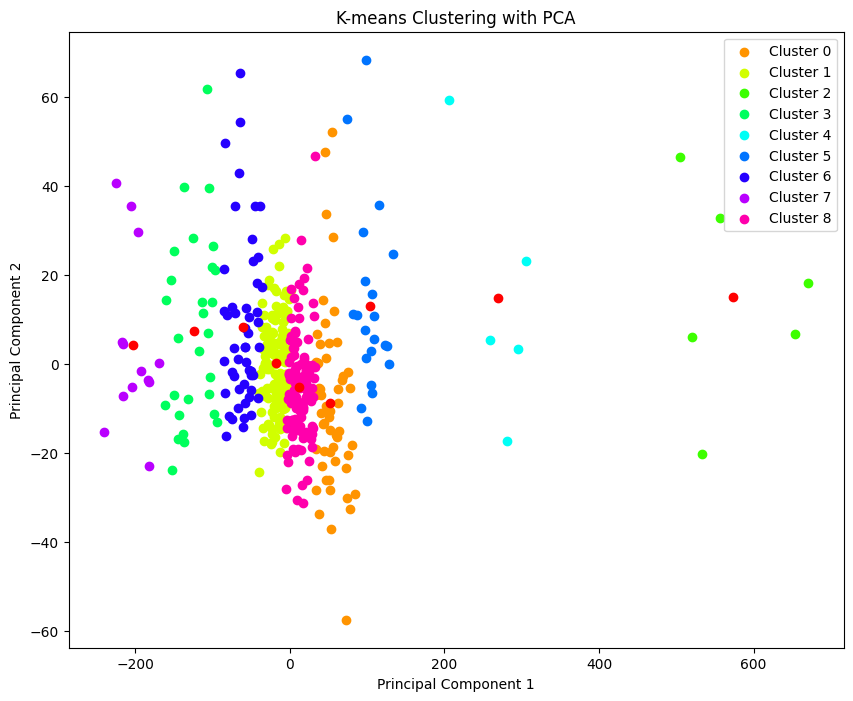

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# Assuming finviz_df is your DataFrame
# finviz_df = pd.read_csv('path_to_your_file.csv') # Uncomment if loading from a CSV file

# Reduce dimensionality to 2D for visualization if necessary
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_finviz_df_z)
n_clusters = 9

# Fitting the KMeans model to the reduced data
model = KMeans(n_clusters=n_clusters, random_state=50).fit(reduced_data)

# Predicting the clusters for each data point
clusters = model.predict(reduced_data)

colors = sns.color_palette('hsv', n_clusters)
labels = [f'Cluster {i}' for i in range(n_clusters)]

# Plotting the clusters
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
        plt.scatter(reduced_data[clusters == i, 0], reduced_data[clusters == i, 1], c=[colors[i]], label=labels[i])
#plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)

# Plotting the cluster centers
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red')

plt.legend()
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
cluster_dict = {'clusters':{}}

for i in range(len(filtered_finviz_df_z.index)):
  cluster_dict['clusters'][list(filtered_finviz_df_z.index)[i]] = clusters[i]

In [ ]:
pd.DataFrame(cluster_dict)

,clusters
0,3
2,4
3,1
4,8
6,1
...,...
579,1
581,1
584,8
586,8


In [ ]:
finviz_df = finviz_df.merge(pd.DataFrame(cluster_dict), left_index=True, right_index=True)

In [ ]:
class_df = finviz_df[["clusters","Ticker"]]
class_df

,clusters,Ticker
0,3,NRG
2,4,CWST
3,1,QCOM
4,8,ORCL
6,1,IDXX
...,...,...
579,1,QLYS
581,1,ADP
584,8,SXT
586,8,CSX


In [ ]:
holder = []
for i in class_df["Ticker"]:
  temp_list = []
  for tic in ['SPY', 'QQQ', 'ARKK', 'IVV','IWM','VTI', 'SMH', 'XLU', 'IYR']:
    thisholding = pivot_df[tic].dropna()
    thisholding = thisholding[thisholding > 0.1]
    thisholding = thisholding.index.to_list()
    if i in thisholding:
      temp_list.append(tic)
  holder.append(temp_list)

In [ ]:
class_df['holder'] = holder

<ipython-input-308-0a5699bdfde2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['holder'] = holder


In [ ]:
class_df[class_df['clusters']==3] #3rd category mostly IWM

,clusters,Ticker,holder
0,3,NRG,[XLU]
101,3,IRT,[IWM]
121,3,NOW,[IVV]
124,3,ZS,[QQQ]
138,3,QRVO,[SMH]
147,3,ARE,[IYR]
151,3,ENV,[IWM]
166,3,META,"[SPY, QQQ, ARKK, IVV, VTI]"
167,3,BLKB,[IWM]
169,3,GEHC,[QQQ]


# Financials Aggregated by Sector (Extra Credit)

You wonder how much of the cluster is driven by Industry or Sectors. Using the holdings for a broad ETF such as SPY, create a table similiar to below using your Finviz data.

![](https://www.dropbox.com/scl/fi/0vwrqdy958yvv6s7pjevv/20240615_FinancialsAggSectors.JPG?rlkey=jwhsvam4a17ems6g6mwojhov6&raw=1)

In [ ]:
finviz_df.groupby('Index')["Forward P/E"].mean()

Index
-                     37.500976
DJIA, NDX, S&P 500    22.604286
DJIA, S&P 500         18.277500
NDX                   44.249167
NDX, S&P 500          26.832429
RUT                   27.291245
S&P 500               23.620544
S&P 500, RUT          26.440000
Name: Forward P/E, dtype: float64